In [1]:
import seaborn
import torch

In [4]:
graphs = torch.load("datasets/unpruned/SG256_SM_Only_Test.pt")
print(len(graphs))

12


In [4]:
dark_matter_masses = []
stellar_masses = []
redshifts = []
for graph in graphs:
  for x in graph.x:
    dark_matter_masses.append(x[0].item())
    redshifts.append(x[1].item())
  for y in graph.y:
    stellar_masses.append(y.item())

In [5]:
print(len(stellar_masses), "halos total")

15437 halos total


In [6]:
print(min(redshifts), 'to', max(redshifts))

9.325244903564453 to 17.535680770874023


Text(0, 0.5, 'Stellar Mass (MSun)')

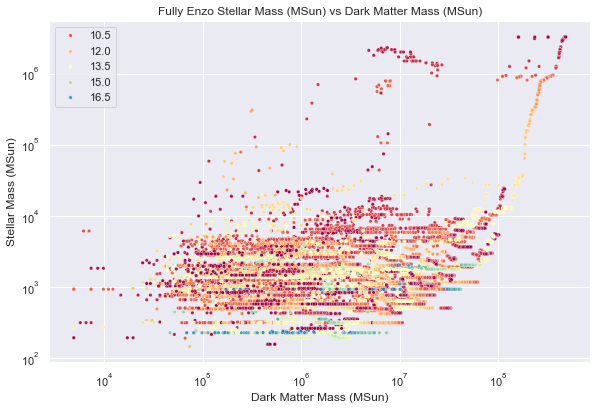

In [10]:
seaborn.set(rc={'figure.figsize':(9.7,6.27)})
ax = seaborn.scatterplot(x=dark_matter_masses, y=stellar_masses, hue=redshifts, palette='Spectral',s=12)
ax.set_title('Fully Enzo Stellar Mass (MSun) vs Dark Matter Mass (MSun)')
ax.set_xscale('log')
ax.set_xlabel('Dark Matter Mass (MSun)')
ax.set_yscale('log')
ax.set_ylabel('Stellar Mass (MSun)')

# Visualizing SM vs no SM classifying

In [14]:
full_graphs = torch.load('datasets/SG256_Full_Graphs_From_Enzo.pt')

dark_matter_masses = []
stellar_masses = []
redshifts = []
for graph in full_graphs:
  for x in graph.x:
    dark_matter_masses.append(x[0].item())
    redshifts.append(x[1].item())
  for y in graph.y > 0:
    stellar_masses.append(y.item())

Text(0, 0.5, 'Redshift')

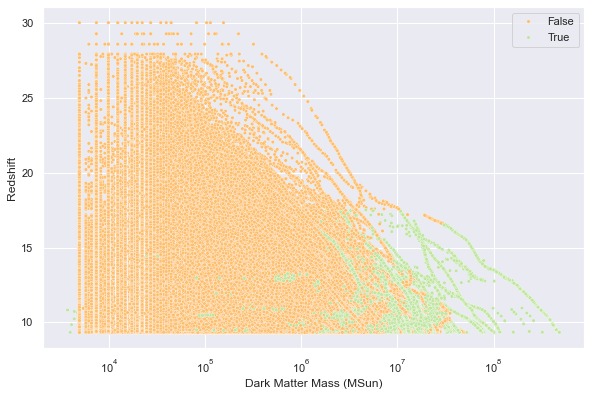

In [15]:
seaborn.set(rc={'figure.figsize':(9.7,6.27)})
ax = seaborn.scatterplot(x=dark_matter_masses, y=redshifts, hue=stellar_masses, palette='Spectral',s=12)
ax.set_xscale('log')
ax.set_xlabel('Dark Matter Mass (MSun)')
ax.set_ylabel('Redshift')